In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import matplotlib.patches as pch
import eleanor_constants as EL

# Export text as editable text instead of shapes:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

%matplotlib inline

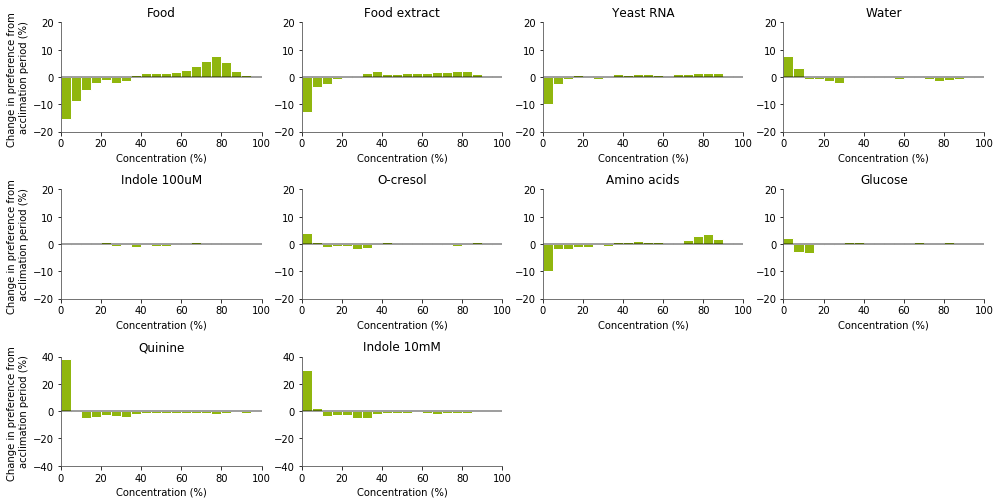

In [2]:
### PLOT STARVED
savename = './figures/starved_concentrations.pdf'
df = pd.read_csv('./data/experiment_IDs/cleaned_static_data.csv')
df = df[df['starved'] == '1day']
df = df[df['dead'] == 'no']
color = EL.c_starve

odors = ["F", "FE", "Y", "W", "I", "O", "A", "G", "Q", "I2"]
odorkeys = ["Food", "Food extract", "Yeast RNA", "Water", "Indole 100uM", 
            "O-cresol", "Amino acids", "Glucose","Quinine", "Indole 10mM"]

fig = plt.figure(figsize=(14, 9))

for i, (odor, odorkey) in enumerate(zip(odors, odorkeys)): 
    ax = fig.add_subplot(4, 4, i+1)
    ax.spines['bottom'].set_color(EL.c_greyax)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(EL.c_greyax)

    xlist = []
    temp = df[df['treatment_odor'] == EL.treatments.get(odor)].copy()
    temp['fname'] = './data/trajectories/video_calculations/' + temp['animal_ID'] + '-experiment.csv'
    for n in temp["fname"].values:
        temp2 = pd.read_csv(n)
        temp2.dropna(subset=['concentration'], inplace=True, axis=0)
        x = temp2["concentration"].values
        xlist += x.tolist()
    
    acc_xlist = []
    temp = df[df['treatment_odor'] == EL.treatments.get(odor)].copy()
    temp['fname'] = './data/trajectories/video_calculations/' + temp['animal_ID'] + '-acclimate.csv'
    for n in temp["fname"].values:
        temp2 = pd.read_csv(n)
        temp2.dropna(subset=['concentration'], inplace=True, axis=0)
        x = temp2["concentration"].values
        acc_xlist += x.tolist()
        
    bins = np.arange(0, 101, 5)
    hist, bin_edges = np.histogram(xlist, bins=bins)
    hist = [100*x/len(xlist) for x in hist]
    acc_hist, acc_bin_edges = np.histogram(acc_xlist, bins=bins)
    acc_hist = [100*x/len(acc_xlist) for x in acc_hist]
    
    norm_hist = [x-y for x, y in zip(hist, acc_hist)]
    ax.bar([x+(bins[1]-bins[0])/2 for x in bins[:-1]], 
            norm_hist, width=bins[1]-bins[0], facecolor=color, edgecolor='#ffffff')
    ax.set_title(odorkey)
    ax.axhline(y=0, xmin=0, xmax=1, color='k', alpha=0.5)
    ax.set_ylim(-20, 20)
    ax.set_yticks(np.arange(-20, 21, 10))
    if odor in ["Q", "I2"]:
        ax.set_ylim(-40, 40)
        ax.set_yticks(np.arange(-40, 41, 20))
    ax.set_xlim(0, 100)
    ax.set_xlabel('Concentration (%)')
    if odor in ['F', 'I', 'Q']:
        ax.set_ylabel('Change in preference from \nacclimation period (%)')

# SET BOUNDARIES AND SAVE FIGURE -----------------------------------------------
plt.tight_layout()
fig.subplots_adjust(wspace=0.2)
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()
plt.show()

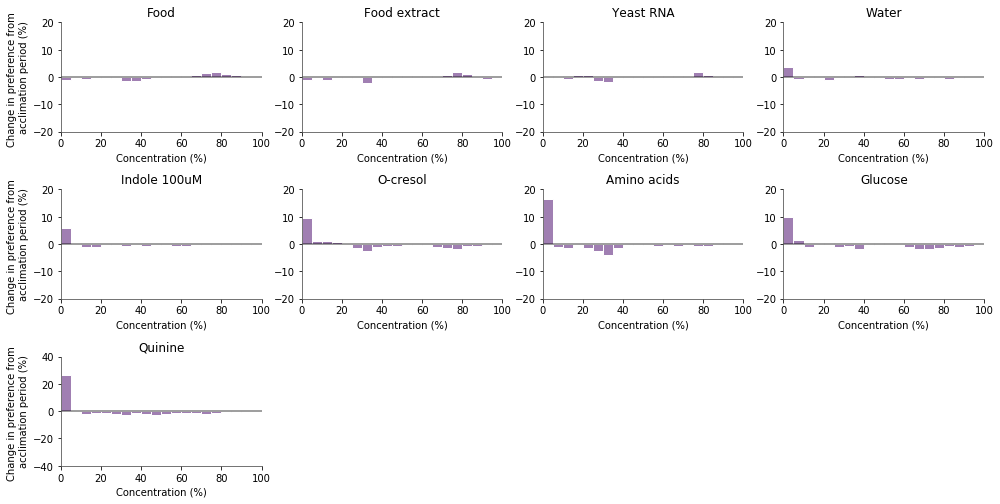

In [4]:
### PLOT FED TRAJECTORIES
df = pd.read_csv('./data/experiment_IDs/cleaned_static_data.csv')
savename = './figures/fed_concentrations.pdf'
df = df[df['starved'] == 'no']
df = df[df['dead'] == 'no']
color = EL.c_fed

odors = ["F", "FE", "Y", "W", "I", "O", "A", "G", "Q"]
odorkeys = ["Food", "Food extract", "Yeast RNA", "Water", "Indole 100uM", 
            "O-cresol", "Amino acids", "Glucose","Quinine"]

fig = plt.figure(figsize=(14, 9))

for i, (odor, odorkey) in enumerate(zip(odors, odorkeys)): 
    ax = fig.add_subplot(4, 4, i+1)
    ax.spines['bottom'].set_color(EL.c_greyax)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(EL.c_greyax)

    xlist = []
    temp = df[df['treatment_odor'] == EL.treatments.get(odor)].copy()
    temp['fname'] = './data/trajectories/video_calculations/' + temp['animal_ID'] + '-experiment.csv'
    for n in temp["fname"].values:
        temp2 = pd.read_csv(n)
        temp2.dropna(subset=['concentration'], inplace=True, axis=0)
        x = temp2["concentration"].values
        xlist += x.tolist()
    
    acc_xlist = []
    temp = df[df['treatment_odor'] == EL.treatments.get(odor)].copy()
    temp['fname'] = './data/trajectories/video_calculations/' + temp['animal_ID'] + '-acclimate.csv'
    for n in temp["fname"].values:
        temp2 = pd.read_csv(n)
        temp2.dropna(subset=['concentration'], inplace=True, axis=0)
        x = temp2["concentration"].values
        acc_xlist += x.tolist()
        
    bins = np.arange(0, 101, 5)
    hist, bin_edges = np.histogram(xlist, bins=bins)
    hist = [100*x/len(xlist) for x in hist]
    acc_hist, acc_bin_edges = np.histogram(acc_xlist, bins=bins)
    acc_hist = [100*x/len(acc_xlist) for x in acc_hist]
    
    norm_hist = [x-y for x, y in zip(hist, acc_hist)]
    ax.bar([x+(bins[1]-bins[0])/2 for x in bins[:-1]], 
            norm_hist, width=bins[1]-bins[0], facecolor=color, edgecolor='#ffffff')
    ax.set_title(odorkey)
    ax.axhline(y=0, xmin=0, xmax=1, color='k', alpha=0.5)
    ax.set_ylim(-20, 20)
    ax.set_yticks(np.arange(-20, 21, 10))
    if odor in ["Q", "I2"]:
        ax.set_ylim(-40, 40)
        ax.set_yticks(np.arange(-40, 41, 20))
    
    ax.set_xlim(0, 100)
    ax.set_xlabel('Concentration (%)')
    if odor in ['F', 'I', 'Q']:
        ax.set_ylabel('Change in preference from \nacclimation period (%)')

# SET BOUNDARIES AND SAVE FIGURE -----------------------------------------------
plt.tight_layout()
fig.subplots_adjust(wspace=0.2)
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()
plt.show()